<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری اول تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>

</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [27]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [28]:
# load data
df = pd.read_excel('worldcities.xlsx')
df.head()

,ville,ville_ascii,lat,lng,pays,iso2,iso3,admin_nom,capital,population,id
0,A Coruña,A Coruna,43.3667,-8.3833,Spain,ES,ESP,Galicia,minor,245468.0,1.724417e+09
1,A Yun Pa,A Yun Pa,13.3939,108.4408,Vietnam,VN,VNM,Gia Lai,minor,53720.0,1.704946e+09
2,Aabenraa,Aabenraa,55.0444,9.4181,Denmark,DK,DNK,Syddanmark,minor,16401.0,1.208000e+09
3,Aachen,Aachen,50.7756,6.0836,Germany,DE,DEU,North Rhine-Westphalia,minor,249070.0,1.276806e+09
4,Aadorf,Aadorf,47.4939,8.8975,Switzerland,CH,CHE,Thurgau,NaN,9036.0,1.756023e+09


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
حذف و تغییر نام ستون ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون‌های
<code>id</code>،
<code>‌capital</code>،
<code>ville_ascii</code>
و
<code>admin_nom</code>
 را از دیتافریم حذف نمایید.
سپس نام ستون‌های
<code>ville</code>
و
<code>pays</code>
 که به زبان فرانسوی نامگذاری شده‌اند را به ترتیب به
<code>city</code>
و
<code>country</code>
تغییر دهید.
</font>
</p>
</div>

In [29]:
# drop and rename
dropped_df = df.drop(['id', 'capital', 'ville_ascii', 'admin_nom'], axis=1, inplace=False)
dropped_df.rename(columns={'ville': 'city', 'pays': 'country'}, inplace=True)
dropped_df.head()

,city,lat,lng,country,iso2,iso3,population
0,A Coruña,43.3667,-8.3833,Spain,ES,ESP,245468.0
1,A Yun Pa,13.3939,108.4408,Vietnam,VN,VNM,53720.0
2,Aabenraa,55.0444,9.4181,Denmark,DK,DNK,16401.0
3,Aachen,50.7756,6.0836,Germany,DE,DEU,249070.0
4,Aadorf,47.4939,8.8975,Switzerland,CH,CHE,9036.0


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
فیلتر کردن داده ها
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
شهر‌های با جمعیت اکیدا کمتر از ۱ میلیون نفر  را از دیتافریم حذف کرده و سپس نوع داده‌های ستون
<code>population</code>
 را از
 <code>float</code>
  به
  <code>int32</code>
   تبدیل نمایید.
</p>
</div>



In [30]:
# filter data
pop_filter_df = dropped_df[dropped_df['population'] > 1000000]


In [31]:
# change type population
pop_filter_df ['population'] = pop_filter_df ['population'].astype('int32')
pop_filter_df.head()

<ipython-input-31-b4b73ea7717b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_filter_df ['population'] = pop_filter_df ['population'].astype('int32')


,city,lat,lng,country,iso2,iso3,population
19,Aba,5.1167,7.3667,Nigeria,NG,NGA,1530000
83,Abidjan,5.3167,-4.0333,Côte d'Ivoire,CI,CIV,4980000
121,Abu Dhabi,24.4667,54.3667,United Arab Emirates,AE,ARE,1483000
131,Abuja,9.0667,7.4833,Nigeria,NG,NGA,3770000
169,Accra,5.5500,-0.2000,Ghana,GH,GHA,2388000


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
کار با داده های تکراری و گم شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
نخست ردیف‌های تکراری دیتافریم و سپس ردیف‌هایی که بیش از یک مورد (۲ مورد و بیش‌تر) از اطلاعات آن‌ها گم‌شده است را از دیتافریم حذف نمایید.
</p>
</div>



In [32]:
# remove duplicated and missed values
dropped_duplicates_df = pop_filter_df.drop_duplicates()
dropped_duplicates_df = dropped_duplicates_df.dropna(thresh=2)


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پر کردن داده های گم‌شده
</h3>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
برای مقادیر گم شده در ستون های
<code>lat</code>
و
<code>lng</code>
،
میانگین همان ستون را در
<ins><strong>همان کشور</strong></ins>
پر کنید
</p>
</div>



In [33]:
# fill the missing values by their country
dropped_duplicates_df['lat'] = dropped_duplicates_df.groupby('country')['lat'].transform(lambda x: x.fillna(x.mean()))
dropped_duplicates_df['lng'] = dropped_duplicates_df.groupby('country')['lng'].transform(lambda x: x.fillna(x.mean()))


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
محاسبه فاصله
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم فاصله هر یک از شهر‌ها را از تهران حساب کنیم. برای این کار از فرمول هاورسین استفاده خواهیم کرد. این فرمول بر اساس طول جغرافیایی (Logitude) و عرض جغرافیایی (Latitude)  دو نقطه در سطح یک کره، فاصله آنها را حساب می‌کند.
فرمول محاسبه فاصله هاورسین در ادامه آورده شده است.
خواسته ما این است که اول با توجه به فرمول هاورسین و مقادیر طول و عرض جغرافیایی تهران که از دیتافریم استخراج می‌کنید تابعی بنویسید که فاصله هر شهر را از تهران محاسبه کند و سپس با استفاده از آن تابع ستون جدیدی در دیتافریم ایجاد کنید که فاصله هر شهر از تهران را داشته باشد
</font>
</p>

</div>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرمول هاورسین:
</font>
</p>



$\lambda_1$, $\lambda_2$ : longitudes of the two points in radians (lng)

$\varphi_1$, $\varphi_2$ : the latitudes of the two points in radians (lat)

$d$ : distance between two cities


$$
r = 6371
$$
$$
a = \sin^2\left(\frac{\varphi_2-\varphi_1}{2}\right) + \cos(\varphi_1)\cos(\varphi_2)\sin^2\left(\frac{\lambda_2-\lambda_1}{2}\right)
$$
$$
d = 2r \operatorname{atan2}\left(\sqrt{a}, \sqrt{1 -a}\right)
$$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>تذکر:</code>
دقت کنید که مقادیر طول و عرض جغرافیایی ثبت شده در دیتافریم به درجه می‌باشد و برای استفاده از رابطه فوق باید به رادیان تبدیل گردد. همچنین توجه کنید ملاک ارزیابی پاسخ شما فرمول فوق و طول و عرض جغرافیایی تهران که در همین دیتافریم درج شده، می‌باشد.
</font>
</p>

In [34]:
# distance function
def distance_from_tehran(lat, lng):
    tehran_lat = 35.6892
    tehran_lng = 51.3890
    R = 6371
    lat1 = math.radians(lat)
    lat2 = math.radians(tehran_lat)
    lng1 = math.radians(lng)
    lng2 = math.radians(tehran_lng)
    delta_lat = lat2 - lat1
    delta_lng = lng2 - lng1
    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(delta_lng / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c


In [35]:
# add a new column in DataFrame
dropped_duplicates_df['distance_from_tehran'] = dropped_duplicates_df.apply(lambda x: distance_from_tehran(x['lat'], x['lng']), axis=1)


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مرتب سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شهرها را بر اساس حروف الفبا به صورت صعودی مرتب نمایید و سپس بر اساس مقدار ستون
<code>
lat
</code>
به صورت نزولی مرتب کرده
</font>
</p>

</div>



In [36]:
# Sorting
sorted_df = dropped_duplicates_df.sort_values(by=['city', 'lat'], ascending=[True, False])
sorted_df.head()

,city,lat,lng,country,iso2,iso3,population,distance_from_tehran
19,Aba,5.1167,7.3667,Nigeria,NG,NGA,1530000,5634.745324
83,Abidjan,5.3167,-4.0333,Côte d'Ivoire,CI,CIV,4980000,6575.542395
121,Abu Dhabi,24.4667,54.3667,United Arab Emirates,AE,ARE,1483000,1280.147869
131,Abuja,9.0667,7.4833,Nigeria,NG,NGA,3770000,5331.681907
169,Accra,5.5500,-0.2000,Ghana,GH,GHA,2388000,6230.926887


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
ذخیره سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریم مرتب شده را بدون نمایه‌هایش (index) در فایلی به فرمت روبه‌رو ذخیره کنید

<code>
StudentNumber.csv
</code>
<p style=color:yellow>
شماره دانشجویی خودتان را جایگزین StudentNumber کنید
</p>
</font>
</p>

</div>



In [37]:
# Save CSV file
sorted_df.to_csv('9931089.csv', index=False)


<div align=center>
    <img src="image-2.png" alt="Alt text">
</div>
<div align=center>
    <p dir="rtl">3 سطر اول فایل شما باید به صورت فوق باشد</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مصور سازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نموداری رسم کنید که فاصله 10 شهری که کمترین فاصله را از تهران دارند را در قالب یک bar chart نمایش دهد.
</font>
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید:
<code> plot_1.png </code>
</p>

</div>



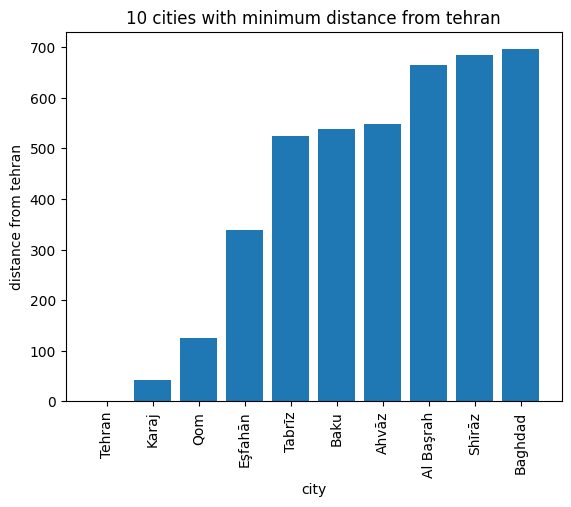

In [38]:
# 10 Nearest Cities to Tehran
min_distance_df = sorted_df.nsmallest(10, 'distance_from_tehran')
# create bar chart
plt.bar(min_distance_df['city'], min_distance_df['distance_from_tehran'])
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('distance from tehran')
plt.title('10 cities with minimum distance from tehran')
plt.savefig('plot_1.png')
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعدی می‌خواهیم جمعیت 10 شهری که کمترین فاصله را با تهران دارند را رسم نمایید.
<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید:
<code> plot_2.png </code>
</font>
</p>

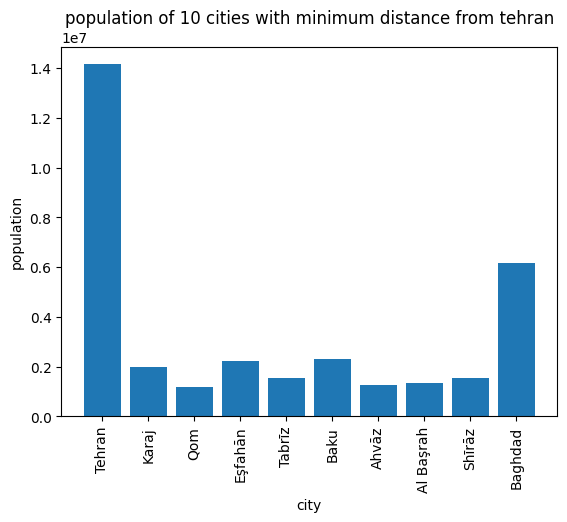

In [39]:
# Population of the 10 Nearest Cities to Tehran
min_distance_df = sorted_df.nsmallest(10, 'distance_from_tehran')
# create bar chart
plt.bar(min_distance_df['city'], min_distance_df['population'])
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('population')
plt.title('population of 10 cities with minimum distance from tehran')
plt.savefig('plot_2.png')
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت آخر میخواهیم نمودار Scatter ای رسم کنید که محور افقی آن Longtitude و محور عمودی آن Latitude باشد.
</font>
خروجی نهایی این نمودار با توجه به حجم بالای دیتاست بسیار جالب است.

<br>
نمودار خروجی خود را به فرمت روبه‌رو ذخیر کنید:
<code> plot_3.png </code>
</p>

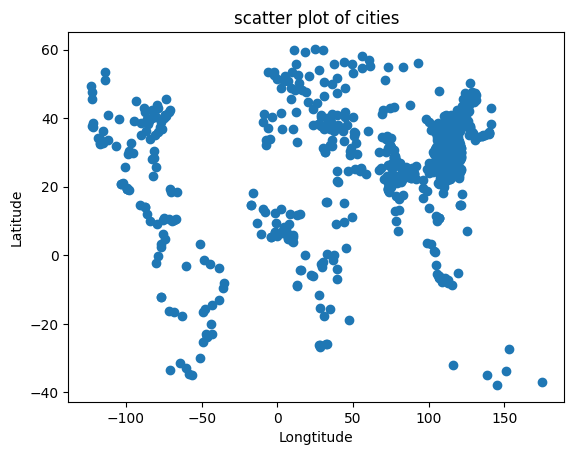

In [40]:
# City Latitudes and Longitudes
plt.scatter(sorted_df['lng'], sorted_df['lat'])
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.title('scatter plot of cities')
plt.savefig('plot_3.png')
plt.show()


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر نوع مصور سازی دیگر و یا تحلیل و کار با داده در صورتی که به فهم بهتر داده کمک کند نمره امتیازی خواهد داشت.
</p>

</div>



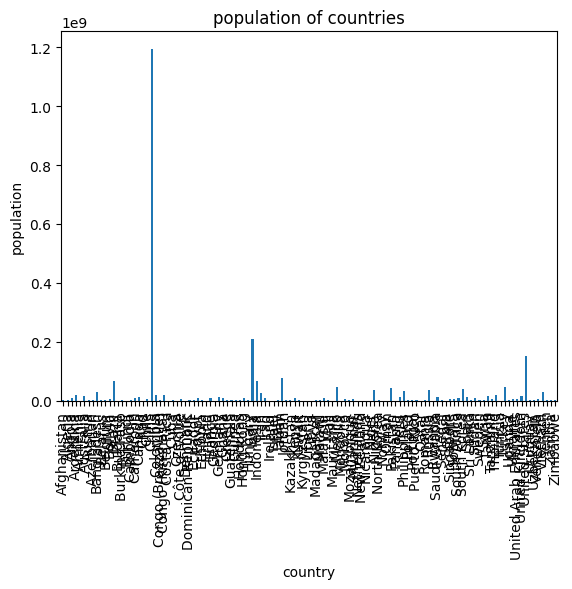

In [24]:
plot_df = sorted_df.groupby('country')['population'].sum()
plot_df.plot.bar()
plt.xlabel('country')
plt.ylabel('population')
plt.title('population of countries')
plt.savefig('plot_4.png')
plt.show()